## Future Sales Forecast

In [122]:
import matplotlib
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('seaborn')
matplotlib.rcParams['text.color'] = 'k'
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12

#### Load Datasets

In [123]:
items = pd.read_csv('datasets/items.csv')
shops = pd.read_csv('datasets/shops.csv')
sales = pd.read_csv('datasets/sales_train.csv')
items_categories = pd.read_csv('datasets/item_categories.csv')

### Data Processing

In [124]:
# Converting the column 'date' to type 'datetime'.
sales['date'] = sales['date'].apply(lambda d: pd.datetime.strptime(d, '%d.%m.%Y'))

In [125]:
# Create columns 'month' and 'total'.
sales['year'] = sales['date'].apply(lambda d: d.year)
sales['month'] = sales['date'].apply(lambda d: d.month)
sales['total_value'] = sales['item_price'] * sales['item_cnt_day']

In [126]:
# Adding column 'item_category_id'.
sales = sales.set_index('item_id').join(items.set_index('item_id')).drop('item_name', axis=1).reset_index()

In [127]:
sales.head()

,item_id,date,date_block_num,shop_id,item_price,item_cnt_day,year,month,total_value,item_category_id
0,0,2014-09-01,20,54,58.0,1.0,2014,9,58.0,40
1,1,2014-04-04,15,55,4490.0,1.0,2014,4,4490.0,76
2,1,2014-04-02,15,55,4490.0,1.0,2014,4,4490.0,76
3,1,2014-07-06,18,55,4490.0,1.0,2014,7,4490.0,76
4,1,2014-08-04,19,55,4490.0,1.0,2014,8,4490.0,76


### Data Analysis and Exploration

In [128]:
monthly_sales_2013 = sales[sales['year']==2013].groupby(['month'])['item_cnt_day', 'total_value'].sum()
monthly_sales_2014 = sales[sales['year']==2014].groupby(['month'])['item_cnt_day', 'total_value'].sum()
monthly_sales_2015 = sales[sales['year']==2015].groupby(['month'])['item_cnt_day', 'total_value'].sum()

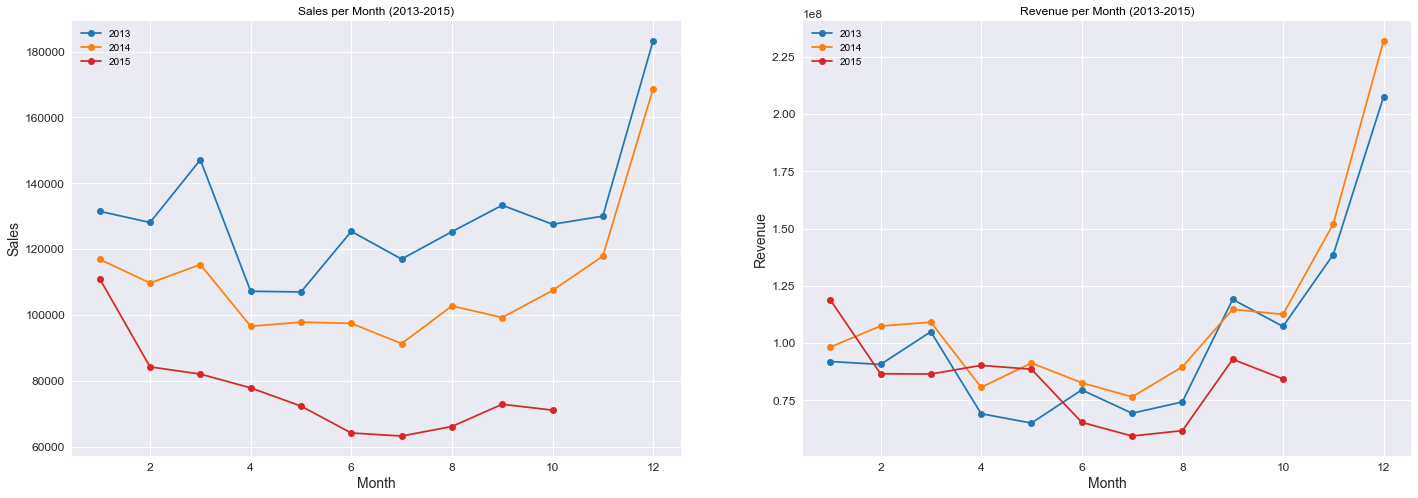

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

axs[0].set_xlabel('Month')
axs[0].set_ylabel('Sales')
axs[0].set_title('Sales per Month (2013-2015)')
axs[0].plot(monthly_sales_2013['item_cnt_day'], '-ok', color='tab:blue', label='2013')
axs[0].plot(monthly_sales_2014['item_cnt_day'], '-ok', color='tab:orange', label='2014')
axs[0].plot(monthly_sales_2015['item_cnt_day'], '-ok', color='tab:red', label='2015')

axs[1].set_xlabel('Month')
axs[1].set_ylabel('Revenue')
axs[1].set_title('Revenue per Month (2013-2015)')
axs[1].plot(monthly_sales_2013['total_value'], '-ok', color='tab:blue', label='2013')
axs[1].plot(monthly_sales_2014['total_value'], '-ok', color='tab:orange', label='2014')
axs[1].plot(monthly_sales_2015['total_value'], '-ok', color='tab:red', label='2015')

for ax in axs.flat:
    ax.legend()

In [130]:
total_sales = sales.groupby(['date_block_num'])['item_cnt_day', 'total_value'].sum()

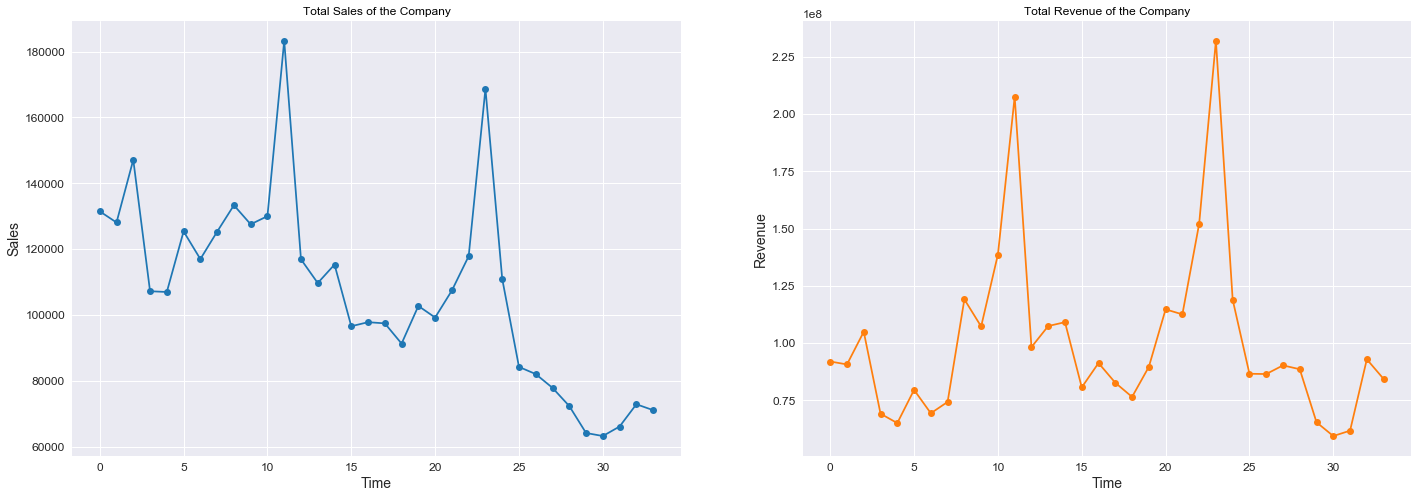

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

axs[0].set_xlabel('Time')
axs[0].set_ylabel('Sales')
axs[0].set_title('Total Sales of the Company')
axs[0].plot(total_sales['item_cnt_day'], '-ok', color='tab:blue')

axs[1].set_xlabel('Time')
axs[1].set_ylabel('Revenue')
axs[1].set_title('Total Revenue of the Company')
axs[1].plot(total_sales['total_value'], '-ok', color='tab:orange')

In [132]:
decomposition_sales = seasonal_decompose(total_sales['item_cnt_day'].values, freq=12)
decomposition_revenue = seasonal_decompose(total_sales['total_value'].values, freq=12)

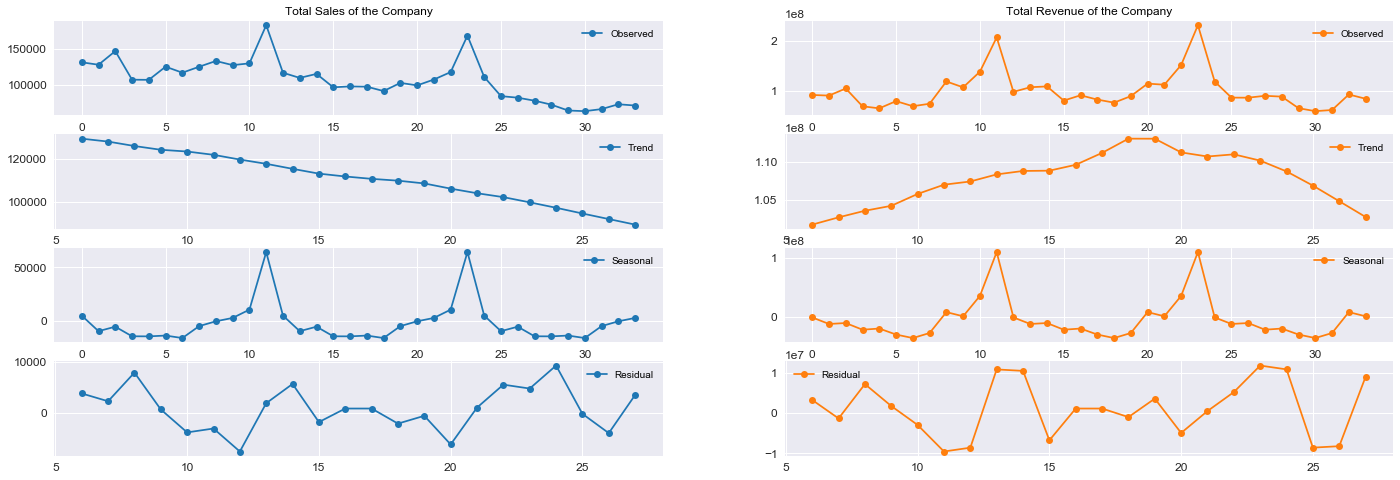

In [133]:
fig, axs = plt.subplots(4, 2, figsize=(24, 8))

axs[0][0].set_title('Total Sales of the Company')
axs[0][0].plot(total_sales['item_cnt_day'], '-ok', color='tab:blue', label='Observed')
axs[1][0].plot(decomposition_sales.trend, '-ok', color='tab:blue', label='Trend')
axs[2][0].plot(decomposition_sales.seasonal, '-ok', color='tab:blue', label='Seasonal')
axs[3][0].plot(decomposition_sales.resid, '-ok', color='tab:blue', label='Residual')

axs[0][1].set_title('Total Revenue of the Company')
axs[0][1].plot(total_sales['total_value'], '-ok', color='tab:orange', label='Observed')
axs[1][1].plot(decomposition_revenue.trend, '-ok', color='tab:orange', label='Trend')
axs[2][1].plot(decomposition_revenue.seasonal, '-ok', color='tab:orange', label='Seasonal')
axs[3][1].plot(decomposition_revenue.resid, '-ok', color='tab:orange', label='Residual')

for ax in axs.flat:
    ax.legend(loc='best')

In [134]:
stores_sales = sales.groupby(['shop_id'])['item_cnt_day'].agg(item_cnt_day='sum')
stores_sales = stores_sales.sort_values(by='item_cnt_day', ascending=False)

In [135]:
stores_more_sales = stores_sales.iloc[0:10] # TOP 10
stores_more_sales = stores_more_sales.sort_values(by='shop_id').reset_index()

stores_less_sales = stores_sales.iloc[-10:] # LAST 10
stores_less_sales = stores_less_sales.sort_values(by='shop_id').reset_index()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<BarContainer object of 10 artists>

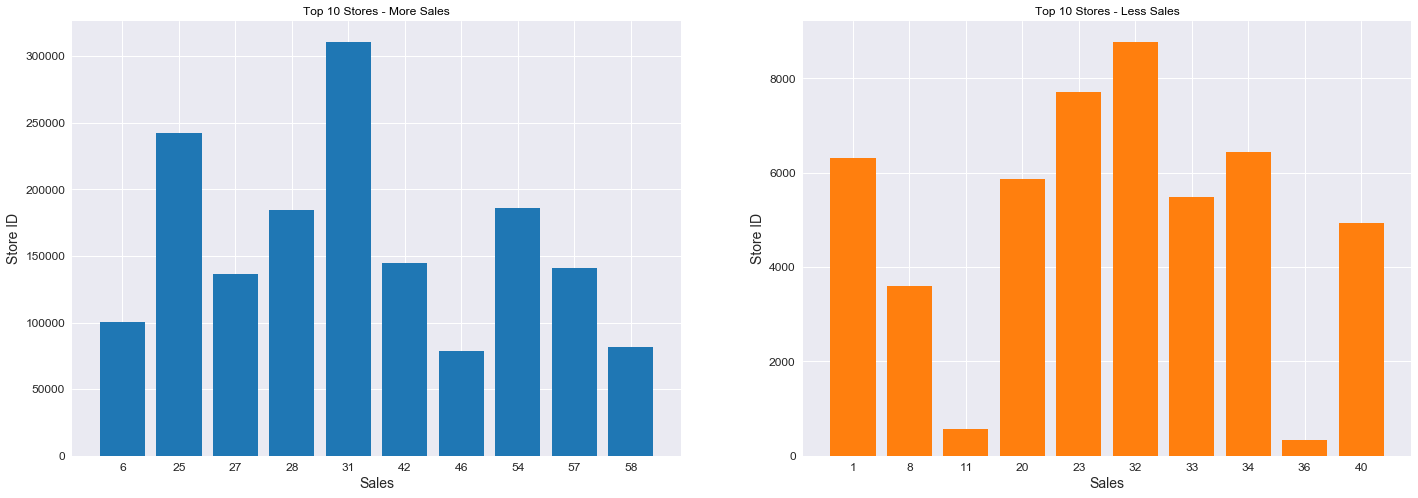

In [136]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

axs[0].set_xlabel('Sales')
axs[0].set_ylabel('Store ID')
axs[0].set_title('Top 10 Stores - More Sales')
axs[0].bar(stores_more_sales['shop_id'].astype('str'), stores_more_sales['item_cnt_day'], color='tab:blue')

axs[1].set_xlabel('Sales')
axs[1].set_ylabel('Store ID')
axs[1].set_title('Top 10 Stores - Less Sales')
axs[1].bar(stores_less_sales['shop_id'].astype('str'), stores_less_sales['item_cnt_day'], color='tab:orange')

In [137]:
stores_revenue = sales.groupby(['shop_id'])['total_value'].agg(total_value='sum')
stores_revenue = stores_revenue.sort_values(by='total_value', ascending=False)

In [138]:
stores_highest_revenue = stores_revenue.iloc[0:10] # TOP 10
stores_highest_revenue = stores_highest_revenue.sort_values(by='shop_id').reset_index()

stores_lower_revenue = stores_revenue.iloc[-10:] # LAST 10
stores_lower_revenue = stores_lower_revenue.sort_values(by='shop_id').reset_index()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<BarContainer object of 10 artists>

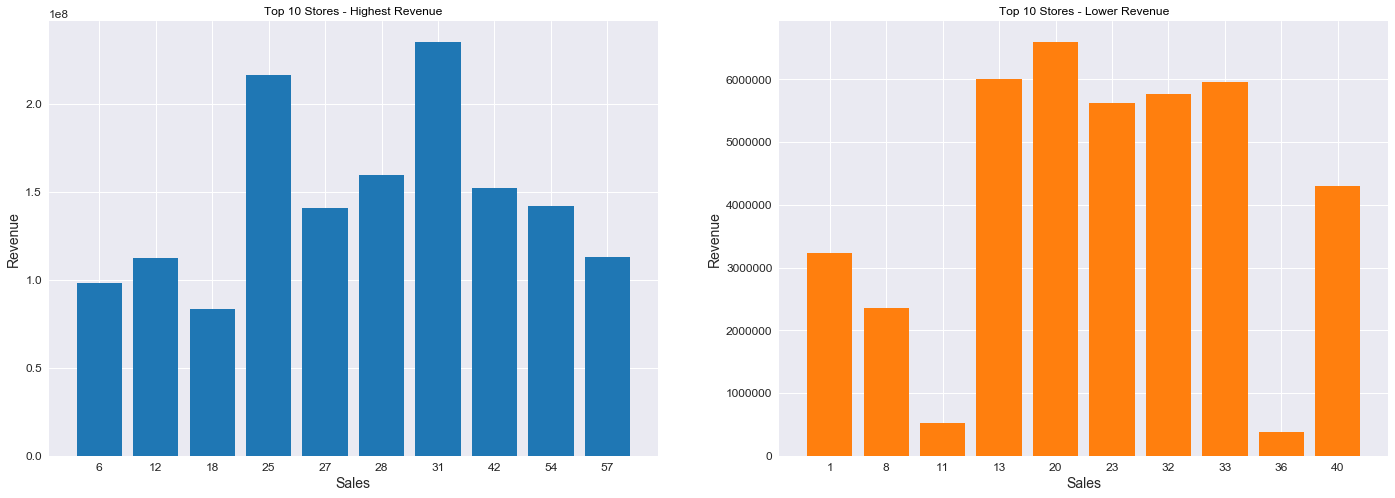

In [139]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

axs[0].set_xlabel('Sales')
axs[0].set_ylabel('Revenue')
axs[0].set_title('Top 10 Stores - Highest Revenue')
axs[0].bar(stores_highest_revenue['shop_id'].astype('str'), stores_highest_revenue['total_value'], color='tab:blue')

axs[1].set_xlabel('Sales')
axs[1].set_ylabel('Revenue')
axs[1].set_title('Top 10 Stores - Lower Revenue')
axs[1].bar(stores_lower_revenue['shop_id'].astype('str'), stores_lower_revenue['total_value'], color='tab:orange')

In [140]:
sales_category = sales.groupby(['item_category_id'])['item_cnt_day'].agg(item_cnt_day='sum')
sales_category = sales_category.sort_values(by='item_cnt_day', ascending=False).astype('int')

In [141]:
category_more_sales = sales_category.iloc[0:10] # TOP 10
category_more_sales = category_more_sales.sort_values(by='item_category_id').reset_index()

category_less_sales = sales_category.iloc[-10:] # LAST 10
category_less_sales = category_less_sales.sort_values(by='item_category_id').reset_index()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<BarContainer object of 10 artists>

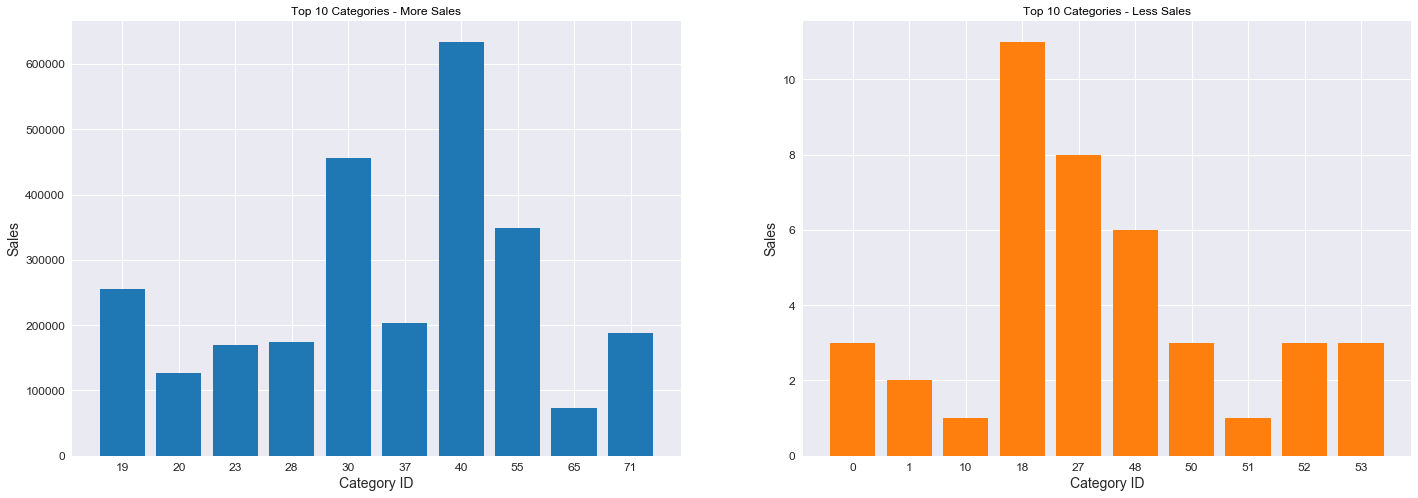

In [142]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8))

axs[0].set_ylabel('Sales')
axs[0].set_xlabel('Category ID')
axs[0].set_title('Top 10 Categories - More Sales')
axs[0].bar(category_more_sales['item_category_id'].astype('str'), category_more_sales['item_cnt_day'], color='tab:blue')

axs[1].set_ylabel('Sales')
axs[1].set_xlabel('Category ID')
axs[1].set_title('Top 10 Categories - Less Sales')
axs[1].bar(category_less_sales['item_category_id'].astype('str'), category_less_sales['item_cnt_day'], color='tab:orange')

### Machine Learning Model

#### Preprocessing

In [143]:
start_date = pd.datetime.strftime(sales['date'].min(), '%Y-%m-%d')
end_date = pd.datetime.strftime(sales['date'].max(), '%Y-%m-%d')

In [144]:
total = sales.groupby(['date_block_num'])['item_cnt_day', 'total_value'].sum()
total.index = pd.date_range(start=start_date, end=end_date, freq='MS')
total = total.reset_index()

In [145]:
total.head()

,index,item_cnt_day,total_value
0,2013-01-01,131479.0,9.194709e+07
1,2013-02-01,128090.0,9.066571e+07
2,2013-03-01,147142.0,1.049327e+08
3,2013-04-01,107190.0,6.915429e+07
4,2013-05-01,106970.0,6.506531e+07


In [146]:
total_sales = total.drop('total_value', axis=1)
total_revenue = total.drop('item_cnt_day', axis=1)

#### Prophet Model

In [147]:
# Prophet reqiures a pandas df at the below config: 'DS' and 'Y'.
# DS = date column; Y = numeric and represents the measurement we wish to forecast;
total_sales.columns = ['ds', 'y']
total_revenue.columns = ['ds', 'y']

In [148]:
total_sales.head()

,ds,y
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [149]:
total_revenue.head()

,ds,y
0,2013-01-01,9.194709e+07
1,2013-02-01,9.066571e+07
2,2013-03-01,1.049327e+08
3,2013-04-01,6.915429e+07
4,2013-05-01,6.506531e+07


In [150]:
# Instantiate Prophet with only yearly seasonality as our data is monthly.
model_sales = Prophet(yearly_seasonality=True, interval_width=0.95)
model_sales.fit(total_sales)

model_revenue = Prophet(yearly_seasonality=True, interval_width=0.95)
model_revenue.fit(total_revenue)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Forecasts

In [151]:
# Forecast for the next 5 months.
# MS - Month Start is the frequency.
future_sales = model_sales.make_future_dataframe(periods=5, freq='MS')
future_revenue = model_revenue.make_future_dataframe(periods=5, freq='MS')

In [152]:
forecasts_sales = model_sales.predict(future_sales)
forecasts_revenue = model_revenue.predict(future_revenue)

In [153]:
forecasts_sales[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,83193.957122,78352.995525,87731.805087
35,2015-12-01,125513.062765,120605.675030,130035.769353
36,2016-01-01,75625.688391,70644.733257,80155.958150
37,2016-02-01,40109.144285,35486.489123,45093.930788
38,2016-03-01,76664.084473,71660.630023,81752.418042


In [154]:
forecasts_revenue[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,1.273537e+08,1.199633e+08,1.343392e+08
35,2015-12-01,2.150137e+08,2.085927e+08,2.216394e+08
36,2016-01-01,8.964808e+07,8.286020e+07,9.644686e+07
37,2016-02-01,5.220236e+07,4.478873e+07,5.953305e+07
38,2016-03-01,1.010207e+08,9.415905e+07,1.079043e+08


#### Visualization

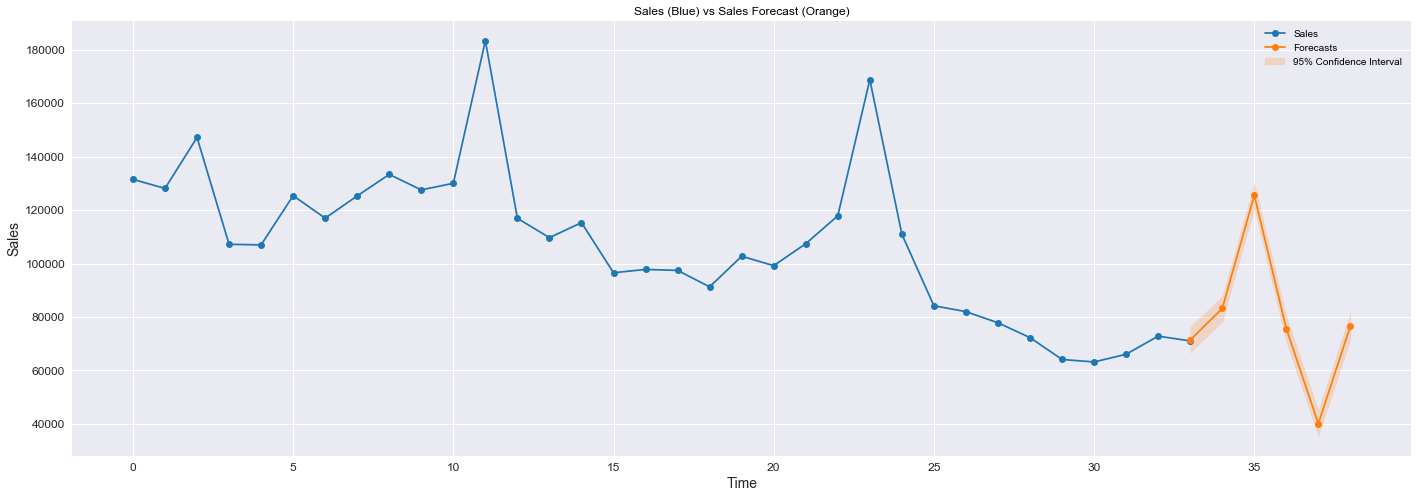

In [157]:
fig, axs = plt.subplots(figsize=(24, 8))
axs.set_title('Sales (Blue) vs Sales Forecast (Orange)')
axs.set_ylabel('Sales')
axs.set_xlabel('Time')
axs.plot(total_sales.drop('ds', axis=1), '-ok', color='tab:blue', label='Sales')
axs.plot(forecasts_sales[-6:].yhat, '-ok', color='tab:orange', label='Forecasts')
axs.fill_between(forecasts_sales[-6:].index, forecasts_sales[-6:].yhat_upper, forecasts_sales[-6:].yhat_lower,
                 alpha=0.2, color='tab:orange', label='95% Confidence Interval')
plt.legend()

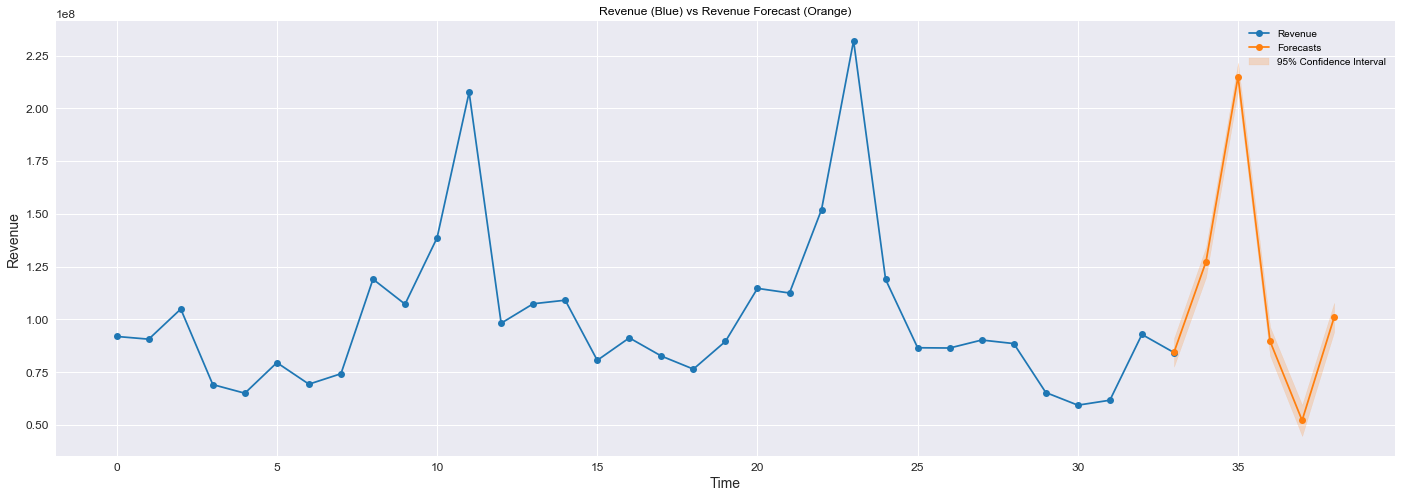

In [158]:
fig, axs = plt.subplots(figsize=(24, 8))
axs.set_title('Revenue (Blue) vs Revenue Forecast (Orange)')
axs.set_ylabel('Revenue')
axs.set_xlabel('Time')
axs.plot(total_revenue.drop('ds', axis=1), '-ok', color='tab:blue', label='Revenue')
axs.plot(forecasts_revenue[-6:].yhat, '-ok', color='tab:orange', label='Forecasts')
axs.fill_between(forecasts_revenue[-6:].index, forecasts_revenue[-6:].yhat_upper, forecasts_revenue[-6:].yhat_lower,
                 alpha=0.2, color='tab:orange', label='95% Confidence Interval')
plt.legend()
